In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- Load spectra and labels ---
spectra_df = pd.read_csv("NOx_spectra_single.csv")
labels_df = pd.read_csv("NOx_labels_single.csv")

# Drop index column if present
X = spectra_df
y = labels_df[['NO', 'NO2', 'N2O']]

# --- Log-transform spectra ---
epsilon = 1e-25  # Small constant to avoid log(0)
X_log = np.log10(X + epsilon)

# --- Standardize spectra ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)

# --- PLS Regression ---
n_components = 10  # You can optimize this
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

# --- Evaluation ---
r2_no = r2_score(y_test['NO'], y_pred[:, 0])
r2_no2 = r2_score(y_test['NO2'], y_pred[:, 1])
r2_n2o = r2_score(y_test['N2O'], y_pred[:, 2])

print(f"R² score for NO (ppb): {r2_no:.3f}")
print(f"R² score for NO2 (ppb): {r2_no2:.3f}")
print(f"R² score for N2O (ppb): {r2_n2o:.3f}")

# Optional: Plot predicted vs true
gases = ['NO', 'NO2', 'N2O']
for i, gas in enumerate(gases):
    plt.figure()
    plt.scatter(y_test[gas], y_pred[:, i], alpha=0.7)
    plt.xlabel(f"True {gas}")
    plt.ylabel(f"Predicted {gas}")
    plt.title(f"{gas} Prediction")
    plt.grid(True)
    plt.plot([y_test[gas].min(), y_test[gas].max()],
             [y_test[gas].min(), y_test[gas].max()], 'r--')  # identity line
    plt.tight_layout()
    plt.show()


KeyError: "['NO2', 'N2O'] not in index"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# --- Load spectra and labels ---
spectra_df = pd.read_csv("NOx_spectra.csv")
labels_df = pd.read_csv("NOx_labels.csv")

# Drop index column if present
X = spectra_df
y = labels_df[['NO', 'NO2', 'N2O']]

# --- PC Reduction ---
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# --- Standardize spectra ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)#, random_state=42)

# --- Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=500)#, random_state=42)
model = MultiOutputRegressor(rf)
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

# --- R² Scores ---
r2_no = r2_score(y_test['NO'], y_pred[:, 0])
r2_no2 = r2_score(y_test['NO2'], y_pred[:, 1])
r2_n2o = r2_score(y_test['N2O'], y_pred[:, 2])

print(f"R² score for NO (ppb): {r2_no:.3f}")
print(f"R² score for NO2 (ppb): {r2_no2:.3f}")
print(f"R² score for N2O (ppb): {r2_n2o:.3f}")

rmse_no = mean_squared_error(y_test['NO'], y_pred[:, 0], squared=False)
rmse_no2 = mean_squared_error(y_test['NO2'], y_pred[:, 1], squared=False)
rmse_n2o = mean_squared_error(y_test['N2O'], y_pred[:, 2], squared=False)

print(f"RMSE for NO (ppb): {rmse_no:.2f}")
print(f"RMSE for NO2 (ppb): {rmse_no2:.2f}")
print(f"RMSE for N2O (ppb): {rmse_n2o:.2f}")


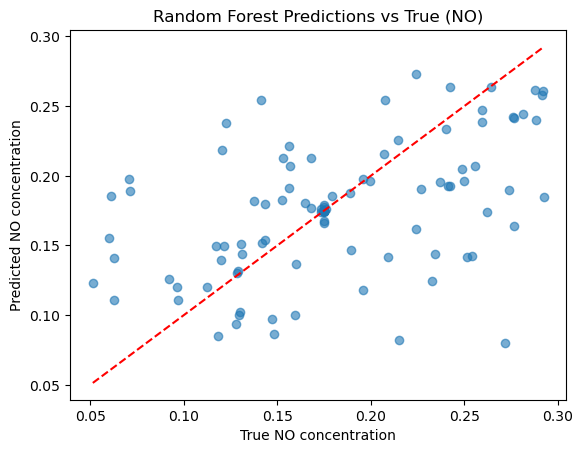

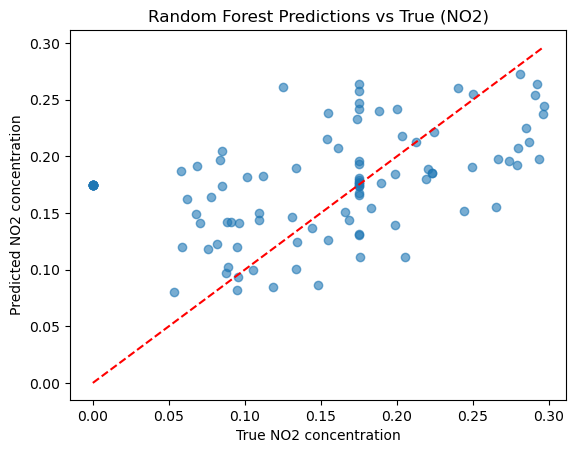

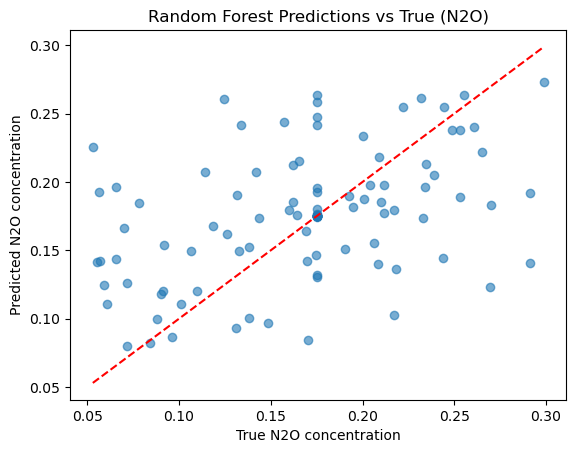

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test['NO'], y_pred[:, 0], alpha=0.6)
plt.plot([y_test['NO'].min(), y_test['NO'].max()],
         [y_test['NO'].min(), y_test['NO'].max()], 'r--')
plt.xlabel('True NO concentration')
plt.ylabel('Predicted NO concentration')
plt.title('Random Forest Predictions vs True (NO)')
plt.show()

plt.scatter(y_test['NO2'], y_pred[:, 0], alpha=0.6)
plt.plot([y_test['NO2'].min(), y_test['NO2'].max()],
         [y_test['NO2'].min(), y_test['NO2'].max()], 'r--')
plt.xlabel('True NO2 concentration')
plt.ylabel('Predicted NO2 concentration')
plt.title('Random Forest Predictions vs True (NO2)')
plt.show()

plt.scatter(y_test['N2O'], y_pred[:, 0], alpha=0.6)
plt.plot([y_test['N2O'].min(), y_test['N2O'].max()],
         [y_test['N2O'].min(), y_test['N2O'].max()], 'r--')
plt.xlabel('True N2O concentration')
plt.ylabel('Predicted N2O concentration')
plt.title('Random Forest Predictions vs True (N2O)')
plt.show()